# Comparison of song's characteristics on every country

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

countries=["ARG","MEX","AUS", "CAN", "ESP", "FRA", "GBP", "GER", "ITA","SUI","EUR", "JPN", "KOR"]
files_name=[]
country_data={}

for x in countries:
    file=f'Datasets/Billboard International Charts (2019-Aug 2020)/{x}.csv'
    if x=="ARG":        
        ARG=pd.read_csv(file,index_col=0)
    elif x=="AUS":
        AUS=pd.read_csv(file,index_col=0)
    elif x=="CAN":
        CAN=pd.read_csv(file,index_col=0)
    elif x=="ESP":
        ESP=pd.read_csv(file,index_col=0)
    elif x=="EUR":
        EUR=pd.read_csv(file,index_col=0)
    elif x=="FRA":
        FRA=pd.read_csv(file,index_col=0)
    elif x=="GBP":
        GBP=pd.read_csv(file,index_col=0)
    elif x=="GER":
        GER=pd.read_csv(file,index_col=0)
    elif x=="ITA":
        ITA=pd.read_csv(file,index_col=0)
    elif x=="JPN":
        JPN=pd.read_csv(file,index_col=0)
    elif x=="KOR":
        KOR=pd.read_csv(file,index_col=0)
    elif x=="MEX":
        MEX=pd.read_csv(file,index_col=0)
    elif x=="SUI":
        SUI=pd.read_csv(file,index_col=0)

In [6]:
complete_dataframe=(
    ARG.merge(AUS, on="Date", suffixes=("_ARG", "_AUS"),how="inner")
    .merge(CAN, on="Date", how="inner")
    .merge(ESP, on="Date", suffixes=("_CAN", "_ESP"),how="inner")
    .merge(EUR, on="Date",how="inner")
    .merge(FRA, on="Date", suffixes=("_EUR", "_FRA"),how="inner")
    .merge(GER, on="Date",how="inner")
    .merge(GBP, on="Date", suffixes=("_GER","_GBP"),how="inner")
    .merge(ITA, on="Date",how="inner")
    .merge(JPN, on="Date", suffixes=("_ITA", "_JPN"),how="inner")
    .merge(KOR, on="Date", how="inner")
    .merge(MEX, on="Date", suffixes=("_KOR", "_MEX"),how="inner")
    .merge(SUI, on="Date", how="inner")
)

complete_dataframe=complete_dataframe.rename(columns={
"Artist":"Artist_SUI",
"TrackName":"TrackName_SUI",
"uri":"uri_SUI",
"acousticness":"acousticness_SUI",
"danceability":"danceability_SUI",
"duration_ms":"duration_ms_SUI",
"energy":"energy_SUI",
"instrumentalness":"instrumentalness_SUI",
"key":"key_SUI",
"liveness":"liveness_SUI",
"loudness":"loudness_SUI",
"mode":"mode_SUI",
"speechiness":"speechiness_SUI",
"tempo":"tempo_SUI",
"time_signature":"time_signature_SUI",
"valence":"valence_SUI"})

# complete_dataframe.head()

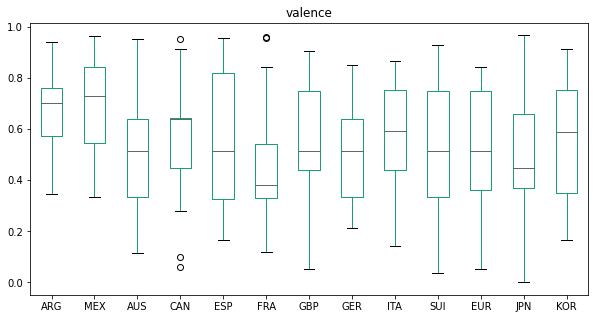

,valence_ARG,valence_MEX,valence_AUS,valence_CAN,valence_ESP,valence_FRA,valence_GBP,valence_GER,valence_ITA,valence_SUI,valence_EUR,valence_JPN,valence_KOR
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000,84.000000
mean,0.672440,0.705774,0.524036,0.582896,0.563988,0.465560,0.563449,0.519179,0.566214,0.523398,0.551699,0.492517,0.562583
std,0.112925,0.187078,0.182483,0.194347,0.219584,0.198171,0.197287,0.168861,0.197877,0.210036,0.185152,0.206796,0.222921
min,0.346000,0.334000,0.115000,0.060500,0.167000,0.119000,0.051700,0.212000,0.141000,0.037700,0.051700,0.000010,0.168000
25%,0.574000,0.547500,0.334000,0.446000,0.327000,0.331250,0.441500,0.334000,0.439750,0.334000,0.360250,0.369000,0.351000
50%,0.704000,0.729000,0.513000,0.639000,0.513000,0.381000,0.513000,0.513000,0.591000,0.513000,0.513000,0.446000,0.589000
75%,0.761000,0.844750,0.639000,0.643000,0.820000,0.543250,0.750000,0.640000,0.752750,0.750000,0.750000,0.659000,0.755000
max,0.940000,0.963000,0.952000,0.952000,0.958000,0.961000,0.905000,0.851000,0.867000,0.930000,0.842000,0.967000,0.915000


In [7]:
#Functions to replicate the plots

def create_column_names(variable_to_study):  
    study_column_names=[]
    for x in range(len(countries)):
        study_column_names.append(f'{variable_to_study}_{countries[x]}')

    return study_column_names

def create_boxplots():
    df_to_study.plot(kind="box",rot=0, figsize=(10,5),colormap='Dark2',title=variable_to_study)
    plt.xticks(np.arange(1,14),countries)
    return plt.show()

#Code for every plot and chart

variable_to_study="valence"

study_column_names=create_column_names(variable_to_study)
columns_for_analysis=len(study_column_names)

df_to_study=complete_dataframe[study_column_names]

create_boxplots()

# print(df_to_study)
df_to_study.describe()

# Boxplot of song's characteristics per year

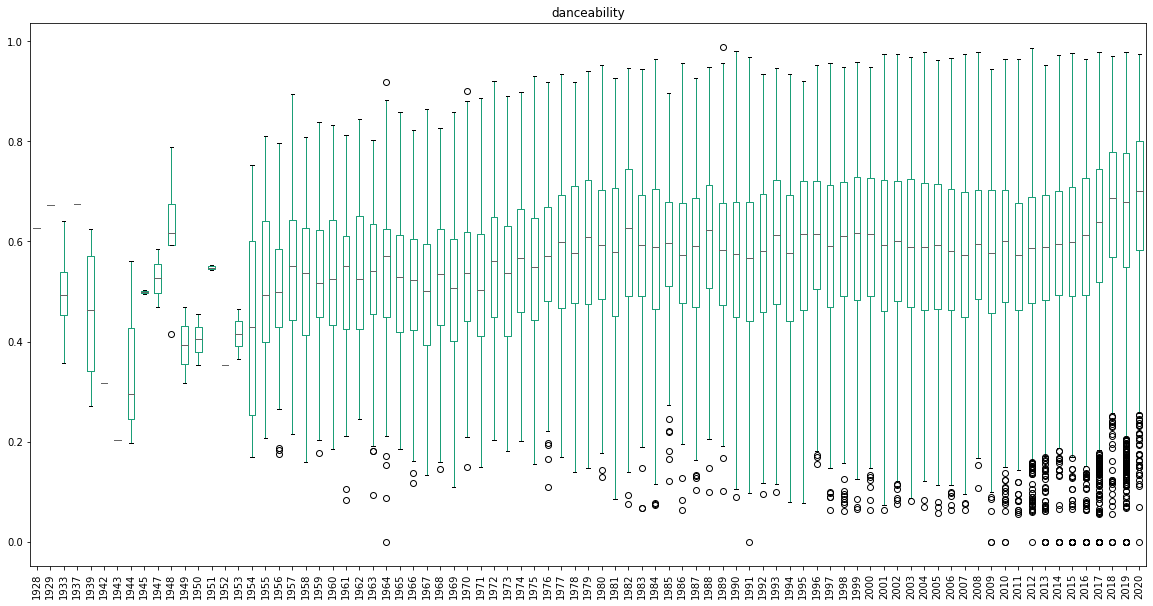

In [8]:
data_df = pd.read_csv("Datasets/data.csv")
data_df.head()

#Variables to use for the study

variable_to_study="danceability"
popularity_minimum=48

#Code for plot

filtered_data_df=data_df.loc[data_df["popularity"]>=popularity_minimum,:]
filtered_data_df

df_to_study=filtered_data_df[[variable_to_study,"year"]]
df_to_study=df_to_study.sort_values(by="year",ascending=True)

years=df_to_study.year.unique()

results=[]

for x in range(len(years)):
    df_years=df_to_study.loc[df_to_study["year"]==years[x],:]
    df_years=df_years[variable_to_study]
    results.append(df_years)

dict_final={}

for x in range(len(years)):    
    dict_1 = {years[x]:(results[x])}
    dict_final.update(dict_1)

final_df=pd.DataFrame(dict_final)


#Boxplot

final_df.plot(kind="box",rot=90, figsize=(20,10),colormap='Dark2',title=variable_to_study)
plt.show()


# Line plot of song's characteristics per year

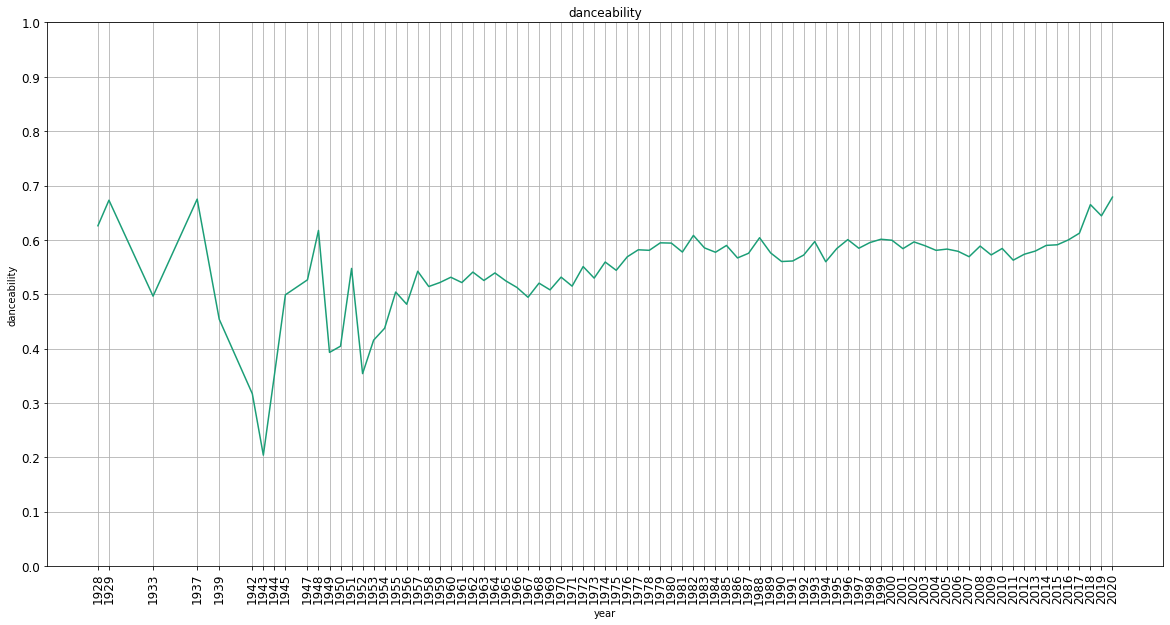

In [9]:
data_df = pd.read_csv("Datasets/data.csv")
data_df.head()

#Variables to use for the study

variable_to_study="danceability"
popularity_minimum=48

#Code for plot

filtered_data_df=data_df.loc[data_df["popularity"]>=popularity_minimum,:]
filtered_data_df

df_to_study=filtered_data_df[[variable_to_study,"year"]]
df_to_study=df_to_study.sort_values(by="year",ascending=True)

test=df_to_study.groupby("year").mean()
years=df_to_study.year.unique()

#Line plot

test.plot(kind="line",rot=90,legend=False, grid=True,ylabel=variable_to_study,fontsize=12,figsize=(20,10),colormap='Dark2',title=variable_to_study,xticks=years, yticks=(np.arange(0,1.1,.1)))
plt.show()